# Cat Breed Classification

In this notebook I want to classify 6 cats breed, here is the list

1.   American Shorthair
2.   Bengal
3.   Maine Coon
4.   Ragdoll
5.   Scottish Fold
6.   Sphynx

Can I identify it with deep learning, lets see in this notebook



# 1. Import Data

In this section, the data is imported from kaggle, <br>
If you want to do this you need  to download kaggle credential first, <br>
Here's to do it <br>

**Navigate to https://www.kaggle.com. Then go to the Account tab of your user profile and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.** <br>

You can download the data from this link https://www.kaggle.com/solothok/cat-breed

The data gathered from Google Images, Shutterstock, and another image provider website with Google Chrome [plug-in](https://chrome.google.com/webstore/detail/download-all-images/nnffbdeachhbpfapjklmpnmjcgamcdmm)


In [ ]:
#you can factory reset time to get one of these GPU Nvidia K80s, T4s, and P100s by random chance
# k80 < T4 < P100
!nvidia-smi 

Mon Dec  6 03:41:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#access file kaggle credential
! chmod 600 /content/kaggle.json

In [ ]:
#import dataset into content folder
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d solothok/cat-breed

 87% 77.0M/89.0M [00:00<00:00, 108MB/s] 
100% 89.0M/89.0M [00:00<00:00, 139MB/s]


In [ ]:
#extract dataset file and store the extract file into tmp folder
import zipfile
zip_file = zipfile.ZipFile('/content/cat-breed.zip')
zip_file.extractall('/tmp/')

# 2. Preparing Data Training and Training Basic Model with CNN

In [ ]:
#import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#create trainining generator
train_generator = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=50,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     zoom_range=0.3,
                                     shear_range=0.3,
                                     fill_mode='nearest')

In [ ]:
#create training data generator
train_data = train_generator.flow_from_directory('/tmp/cat-breed/TRAIN',
                                                 target_size=(225, 225),
                                                 batch_size=128,
                                                 class_mode='categorical',)

Found 1200 images belonging to 6 classes.


In [ ]:
#create data validation
val_generator = ImageDataGenerator(rescale=1/255)

val_data = val_generator.flow_from_directory('/tmp/cat-breed/TEST',
                                             target_size=(225, 225),
                                             class_mode='categorical',
                                             batch_size=128)

Found 300 images belonging to 6 classes.


In [ ]:
#model construction

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_simple = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(225, 225, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

In [ ]:
#compile model

model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training model

history = model_simple.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=25,
                    validation_data=val_data,
                    validation_steps=len(val_data),
                    verbose=1)

Epoch 1/25
10/10 [==============================] - 36s 2s/step - loss: 1.8026 - accuracy: 0.1592 - val_loss: 1.7664 - val_accuracy: 0.1667
Epoch 2/25
10/10 [==============================] - 25s 2s/step - loss: 1.7496 - accuracy: 0.1783 - val_loss: 1.7361 - val_accuracy: 0.2033
Epoch 3/25
10/10 [==============================] - 25s 3s/step - loss: 1.7219 - accuracy: 0.2317 - val_loss: 1.7232 - val_accuracy: 0.2400
Epoch 4/25
10/10 [==============================] - 25s 2s/step - loss: 1.6895 - accuracy: 0.3000 - val_loss: 1.7272 - val_accuracy: 0.2433
Epoch 5/25
10/10 [==============================] - 25s 3s/step - loss: 1.6519 - accuracy: 0.2708 - val_loss: 1.7578 - val_accuracy: 0.2433
Epoch 6/25
10/10 [==============================] - 25s 2s/step - loss: 1.6242 - accuracy: 0.3150 - val_loss: 1.8070 - val_accuracy: 0.2867
Epoch 7/25
10/10 [==============================] - 25s 2s/step - loss: 1.5657 - accuracy: 0.3583 - val_loss: 1.6421 - val_accuracy: 0.3333
Epoch 8/25
10/10 [==

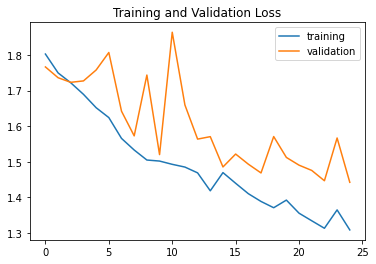

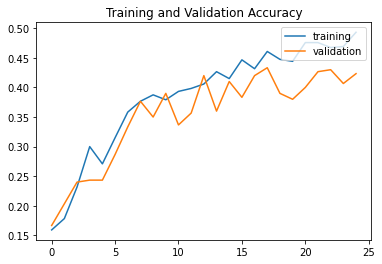

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(['training','validation'], loc='upper right')
plt.show()


From this training we can know that our basic model is not good enough, <br>
we only gain accuracy 46,17 and validation accuracy 43,00, <br>
But, this model can be improved further

# 3. Transfer Learning with Inception V3

Actually there are so many transfer learning method, you can find this information in this link: https://keras.io/api/applications/

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
tf.keras.backend.clear_session()

pre_trained_model = InceptionV3(input_shape = (225, 225, 3), 
                                include_top = False, 
                                weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

# cut off at the layer named 'mixed7'
last_layer = pre_trained_model.get_layer('mixed7')

# know its output shape
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

# Feed the last cut-off layer to our own layers
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)

# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x) 
# Add a fully connected layer with 256 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)

# Add a dropout rate of 0.3
x = tf.keras.layers.Dropout(0.3)(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)

# Add a final dropout layer
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = tf.keras.layers.Dense  (6, activation='softmax')(x)           

model_inceptionv3 = tf.keras.Model(pre_trained_model.input, x) 

last layer output shape:  (None, 12, 12, 768)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The function of this callback is to save every best model based on choosen variable in the google drive, <br>

Here's the example how it works: <br>
epoch 1 -> accuracy 50,23 -> save <br>
epoch 2 -> accuracy 48,33 -> notsave <br>
epoch 3 -> accuracy 55,34 -> save <br>
epoch 4 -> accuracy 56,23 -> save <br>
.... <br>
You can read the documentation here: https://keras.io/api/callbacks/model_checkpoint/

In [ ]:
#define checkpoint
checkpoint_filepath="/content/drive/My Drive/Colab Notebooks/Cat_breed/model/catbreed-{epoch:03d}-{accuracy:.4f}-{val_accuracy:.4f}.h5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
	filepath=checkpoint_filepath,
	save_weights_only=False,
	monitor='accuracy',
	mode='max',
	save_best_only=True)

The function of this callback is to reduce learning rate if there are no improvement on the training based on choosen variable <br>


You can read the documentation here: https://keras.io/api/callbacks/reduce_lr_on_plateau/

In [ ]:
#reduce learning rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,         
    patience=7, 
    mode='auto',
    min_lr=2e-7)

The function of this callback is, after the learning rate reduce to the minimum amount, and there isn't improvement in the model, we can stop the training process early <br>

You can read the documentation here: https://keras.io/api/callbacks/early_stopping/

In [ ]:
#early stop
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=15,
    min_delta=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
model_inceptionv3.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
history_inception = model_inceptionv3.fit(train_data,
                              epochs=250,
                              callbacks = [checkpoint,reduce_lr,early_stop],
                              verbose=1,
                              validation_data=val_data)

Epoch 1/250
10/10 [==============================] - 39s 3s/step - loss: 3.4844 - accuracy: 0.2425 - val_loss: 1.3871 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 2/250
10/10 [==============================] - 30s 3s/step - loss: 1.6664 - accuracy: 0.3767 - val_loss: 1.2006 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 3/250
10/10 [==============================] - 30s 3s/step - loss: 1.2614 - accuracy: 0.5217 - val_loss: 0.8644 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 4/250
10/10 [==============================] - 29s 3s/step - loss: 1.1147 - accuracy: 0.5892 - val_loss: 0.6585 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 5/250
10/10 [==============================] - 30s 3s/step - loss: 0.9470 - accuracy: 0.6383 - val_loss: 0.5753 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 6/250
10/10 [==============================] - 30s 3s/step - loss: 0.8883 - accuracy: 0.6517 - val_loss: 0.4769 - val_accuracy: 0.8433 - lr: 0.0010
Epoch 7/250
10/10 [==============================] - 30s 3s/step - loss: 0.8

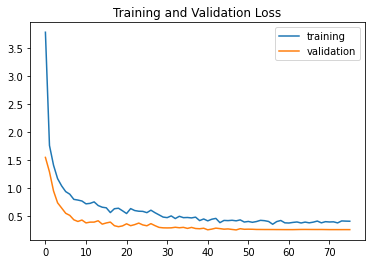

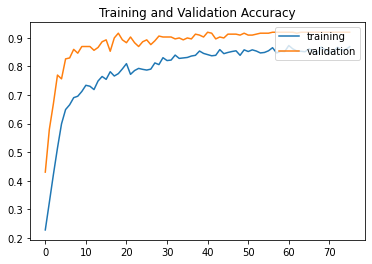

In [ ]:
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

plt.plot(history_inception.history['accuracy'])
plt.plot(history_inception.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(['training','validation'], loc='upper right')
plt.show()

We got the highest <br>
**accuracy     : 0.8867** <br>
**val_accuracy : 0.9167**

# 4. Evaluation

In [ ]:
num_of_test_samples = 300
from sklearn.metrics import classification_report, confusion_matrix

model = model_inceptionv3
val_data = val_generator.flow_from_directory('/tmp/cat-breed/TEST',
                                                              batch_size=300,
                                                              class_mode='categorical',
                                                              target_size=(225, 225),
                                                              shuffle = False)

filenames = val_data.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(val_data, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_data.classes, y_pred))
print('Classification Report')
target_names = ['americanshorthair', 'bengal', 'mainecoon','ragdoll','scottishfold','sphynx']
print(classification_report(val_data.classes, y_pred, target_names=target_names))

Found 300 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[40  3  2  1  4  0]
 [ 2 47  1  0  0  0]
 [ 1  0 45  3  1  0]
 [ 0  1  0 49  0  0]
 [ 3  0  0  1 45  1]
 [ 0  0  1  0  0 49]]
Classification Report
                   precision    recall  f1-score   support

americanshorthair       0.87      0.80      0.83        50
           bengal       0.92      0.94      0.93        50
        mainecoon       0.92      0.90      0.91        50
          ragdoll       0.91      0.98      0.94        50
     scottishfold       0.90      0.90      0.90        50
           sphinx       0.98      0.98      0.98        50

         accuracy                           0.92       300
        macro avg       0.92      0.92      0.92       300
     weighted avg       0.92      0.92      0.92       300



As we can see that my model performance is pretty good, because the precision, recall, f1-score is quite high, <br>
so this model can classify these 6 cat breed <br> 
The highest score is sphynx, and the lowest is american shorthair

In [ ]:
def find_wrong_predict(prediction, actual):
  product_dict = {
    0: 'americanshorthair',
    1: 'bengal',
    2: 'mainecoon',
    3: 'ragdoll',
    4: 'scottishfold',
    5: 'sphynx',
  }
  wrong_index = list()
  wrong_prediction = list()
  actual_label = list()
  for i in range(len(prediction)):
    if prediction[i] == actual[i]:
      pass
    else:
      wrong_index.append(i)
      wrong_prediction.append(product_dict[prediction[i]])
      actual_label.append(product_dict[actual[i]])

    df = pd.DataFrame(list(zip(wrong_index, wrong_prediction, actual_label)),
                      columns = ['Index', 'Predicted Label', 'Actual Label'])
  
  return df

In [ ]:
wrong_classify = find_wrong_predict(y_pred, val_data.classes)
wrong_classify

,Index,Predicted Label,Actual Label
0,0,scottishfold,americanshorthair
1,2,mainecoon,americanshorthair
2,3,ragdoll,americanshorthair
3,4,scottishfold,americanshorthair
4,6,mainecoon,americanshorthair
5,11,scottishfold,americanshorthair
6,22,bengal,americanshorthair
7,24,bengal,americanshorthair
8,26,scottishfold,americanshorthair
9,40,bengal,americanshorthair


In [ ]:
def show_misclassified(index):
  x,y = val_data.next()
  image = x[index]
  print('==================')
  plt.figure(figsize=(3,3))
  plt.imshow(image)
  plt.show()
  print('Actual Image :', str(wrong_classify[wrong_classify['Index']==index]['Actual Label'].values)[2:-2])
  print('Predicted Label:', str(wrong_classify[wrong_classify['Index']==index]['Predicted Label'].values)[2:-2])
  print('==================')

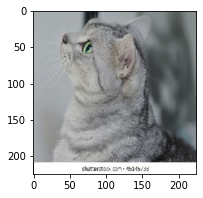

Actual Image : americanshorthair
Predicted Label: scottishfold


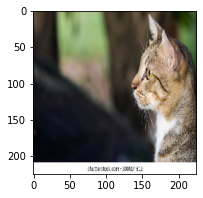

Actual Image : americanshorthair
Predicted Label: mainecoon


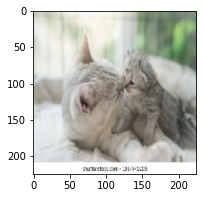

Actual Image : americanshorthair
Predicted Label: ragdoll


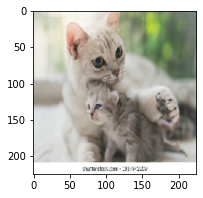

Actual Image : americanshorthair
Predicted Label: scottishfold


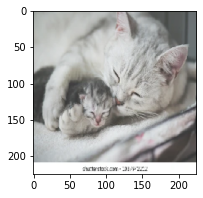

Actual Image : americanshorthair
Predicted Label: mainecoon


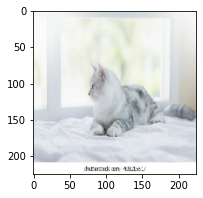

Actual Image : americanshorthair
Predicted Label: scottishfold


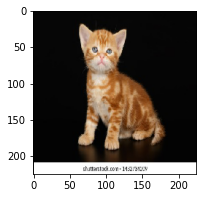

Actual Image : americanshorthair
Predicted Label: bengal


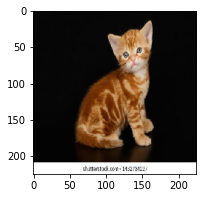

Actual Image : americanshorthair
Predicted Label: bengal


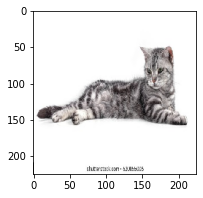

Actual Image : americanshorthair
Predicted Label: scottishfold


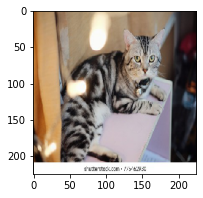

Actual Image : americanshorthair
Predicted Label: bengal


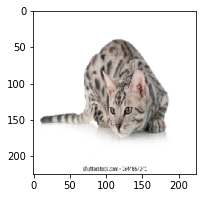

Actual Image : bengal
Predicted Label: americanshorthair


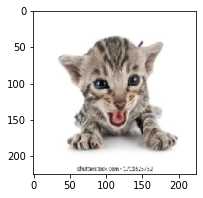

Actual Image : bengal
Predicted Label: americanshorthair


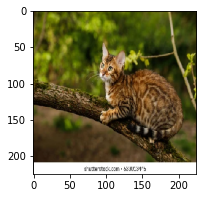

Actual Image : bengal
Predicted Label: mainecoon


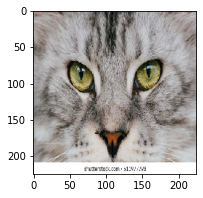

Actual Image : mainecoon
Predicted Label: americanshorthair


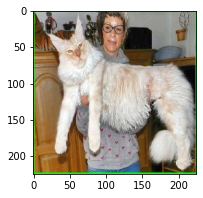

Actual Image : mainecoon
Predicted Label: ragdoll


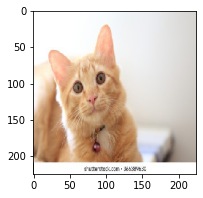

Actual Image : mainecoon
Predicted Label: scottishfold


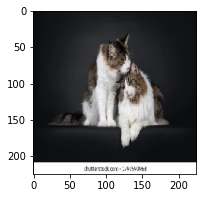

Actual Image : mainecoon
Predicted Label: ragdoll


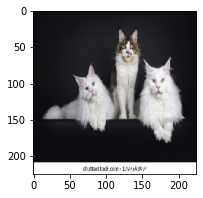

Actual Image : mainecoon
Predicted Label: ragdoll


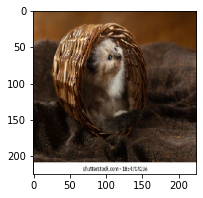

Actual Image : ragdoll
Predicted Label: bengal


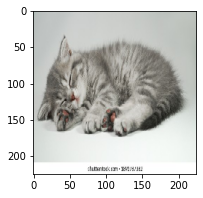

Actual Image : scottishfold
Predicted Label: americanshorthair


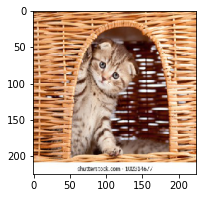

Actual Image : scottishfold
Predicted Label: sphinx


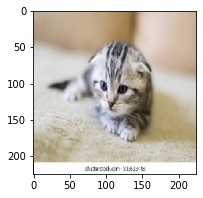

Actual Image : scottishfold
Predicted Label: americanshorthair


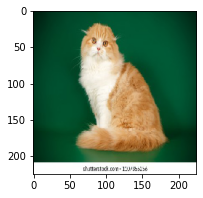

Actual Image : scottishfold
Predicted Label: ragdoll


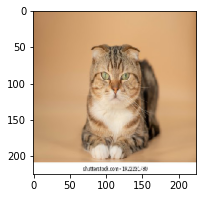

Actual Image : scottishfold
Predicted Label: americanshorthair


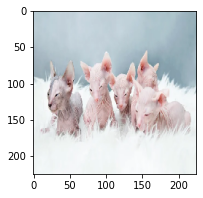

Actual Image : sphinx
Predicted Label: mainecoon


In [ ]:
for index in wrong_classify.Index:
  show_misclassified(index)

After examining the misclassified images, here is some of the conclusion:


*   The american shorthair is sometimes misclassified with scottish fold because of the color and the pattern, the common color of american shorthair is grey with unique pattern but in some of my data, the pattern is not visible so its misclassified as scottish fold, because the common color of this cat breed is grey
*   American shorthair with bengal, both of them has different unique pattern, but our model cant classify it
*   Maine coon with american shorthair, american shorthair has unique pattern, and sometimes the color is orange, in the other hand maine coon sometime has orange color but don't have the pattern, and some of my data the pattern is not visible
*   Maine coon with ragdoll, both of them have thick fur, the common color of ragdoll is white, so if the mainecoon has whtite color, it will classify as ragdoll

In [ ]:
model_inceptionv3.save_weights("/content/drive/My Drive/Colab Notebooks/Cat_breed/model_inceptionv3_weights.h5")
model_inceptionv3.save("/content/drive/My Drive/Colab Notebooks/Cat_breed/model_inceptionv3.h5")